In [1]:
# bike sharing demand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

# 분류, 회귀? => 회귀 => 자전거 대여량 예측문제

In [136]:
train = pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'])
# 아예 읽을때 datetime으로 읽자
test = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=['datetime'])

In [106]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [3]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

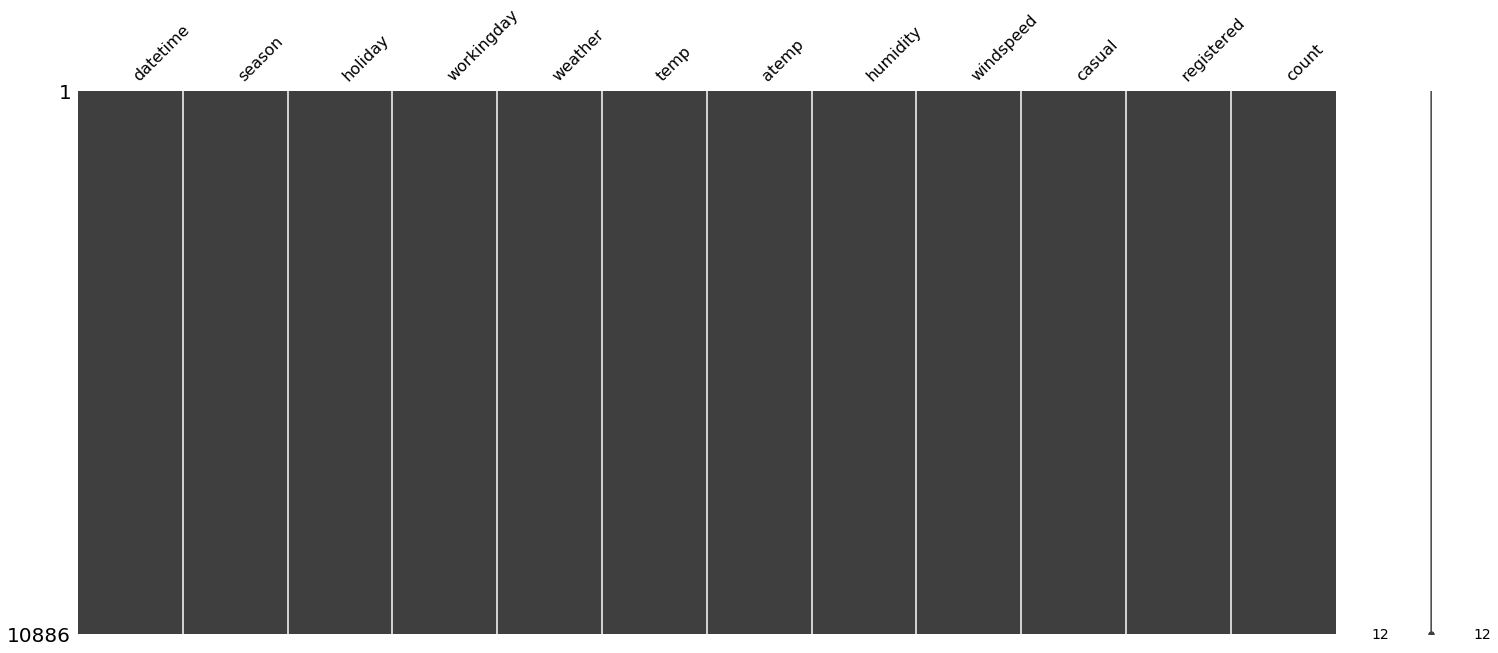

In [4]:
import missingno as msno
msno.matrix(train)

In [5]:
train['datetime'].dt.year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: datetime, dtype: int64

In [137]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [7]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,NaN,NaN
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,NaN,NaN
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,NaN,NaN
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,NaN,NaN


[Text(0.5, 1.0, '연도별 대여량')]

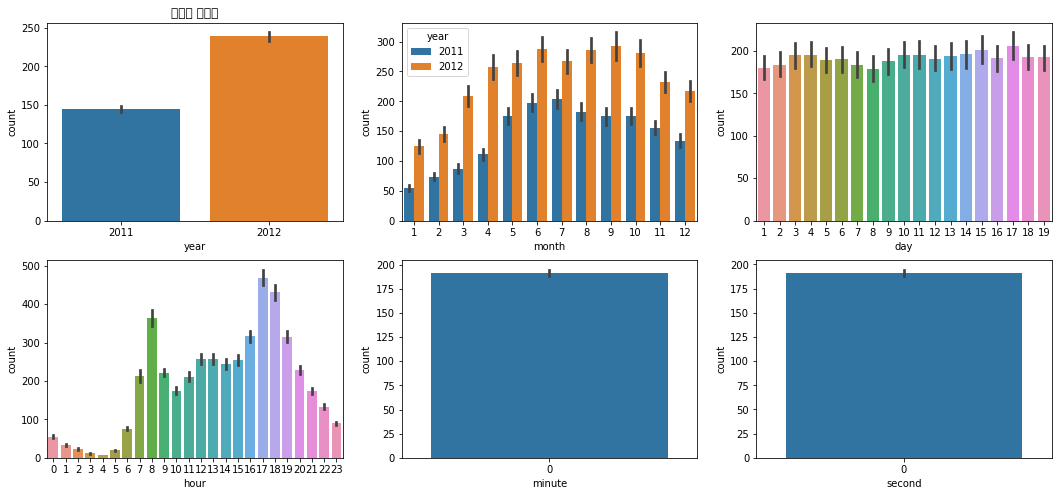

In [8]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
# return값을 보면 리턴값이 크게 2개
fig.set_size_inches(18,8)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count',hue='year', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)
ax1.set(title='연도별 대여량')
# 근데 이것들은 전체 평균임

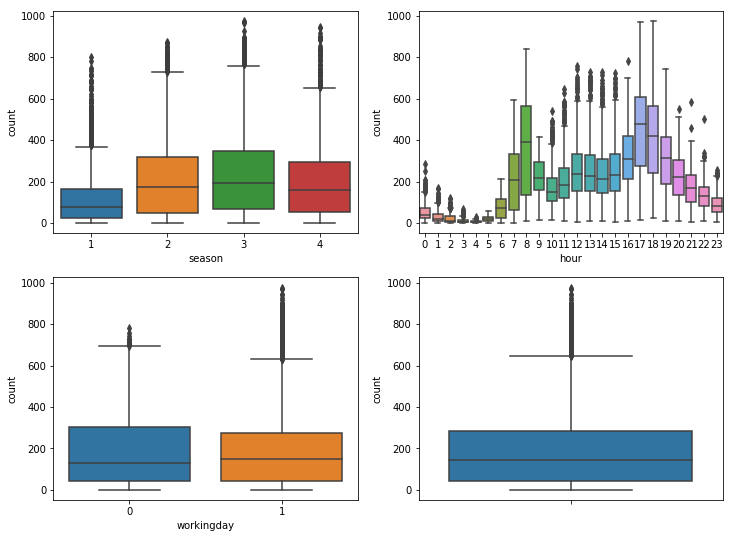

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
sns.boxplot(data=train, y='count', x='season', ax=axes[0][0], orient='v')
sns.boxplot(data=train, y='count',x='hour', ax=axes[0][1], orient='v')
sns.boxplot(data=train, y='count',x='workingday', ax=axes[1][0], orient='v')
sns.boxplot(data=train, y='count', ax=axes[1][1], orient='v')

In [138]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train['dayofweek'].head()
# 요일별 0-6

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

In [11]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [12]:
# 시간의 흐름에 따른 그래프(0~23)
# 근무일의 여부에 따른 그래프(0,1)
# 요일에 따른 그래프(0~6)
# 계절에 따른 그래프(1~4)

# 시계열 데이터의 시각화!

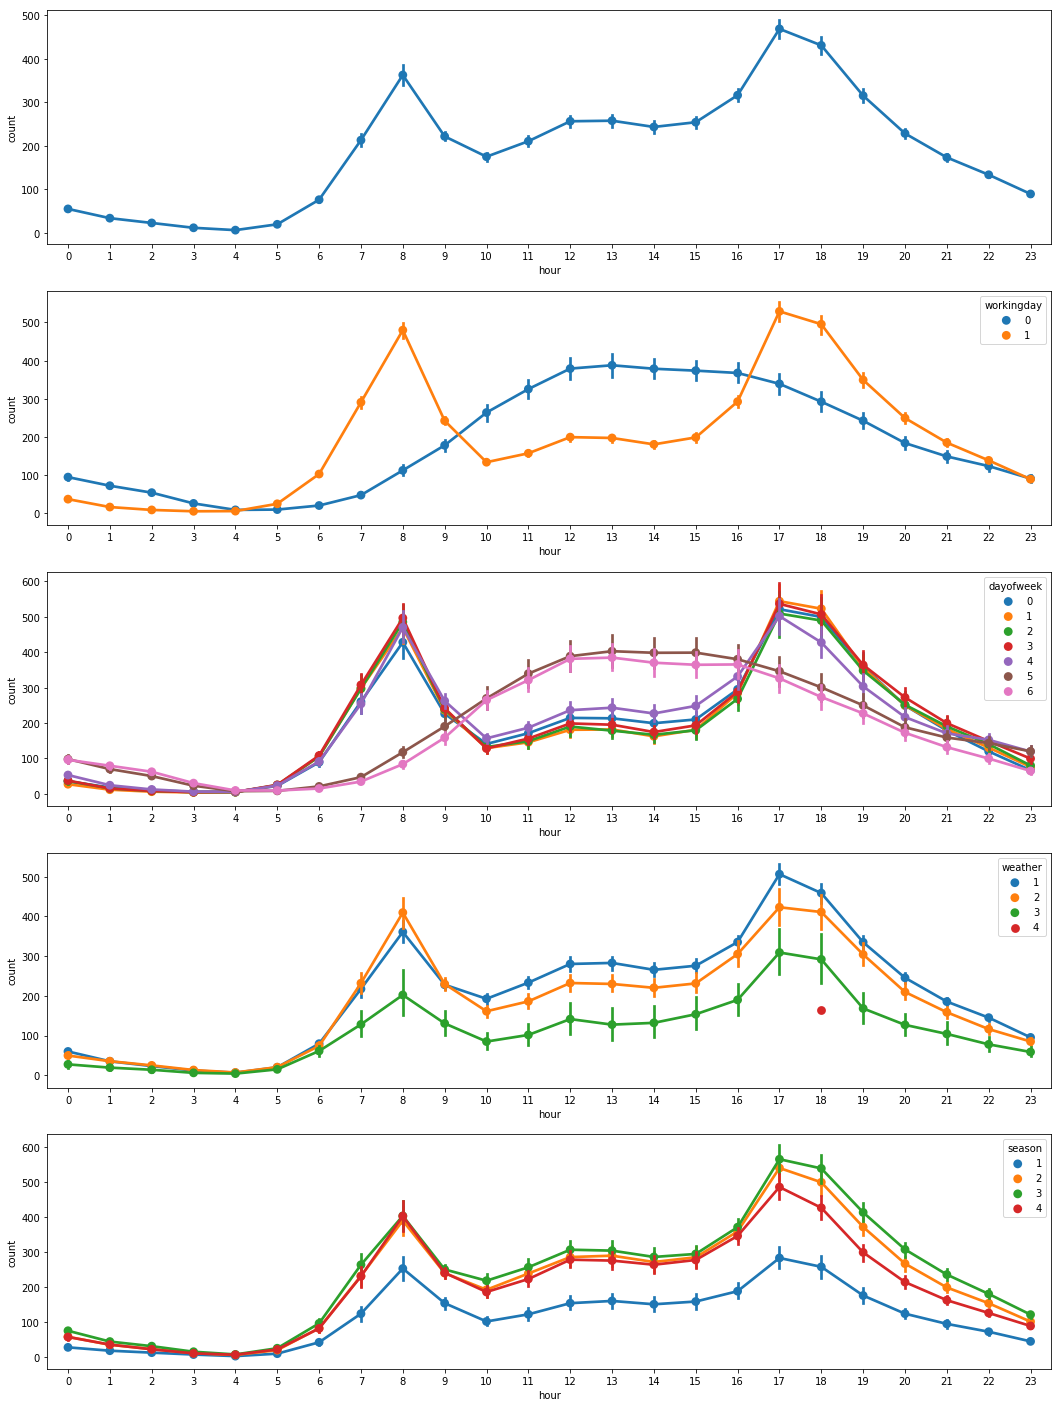

In [13]:
fig, axes = plt.subplots(nrows=5, figsize=(18,25))
# 'hue' 속성 => grouping
sns.pointplot(data=train,x='hour',y='count',ax=axes[0])
sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=axes[1])
sns.pointplot(data=train,x='hour',y='count',hue='dayofweek',ax=axes[2])
sns.pointplot(data=train,x='hour',y='count',hue='weather',ax=axes[3])
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=axes[4])

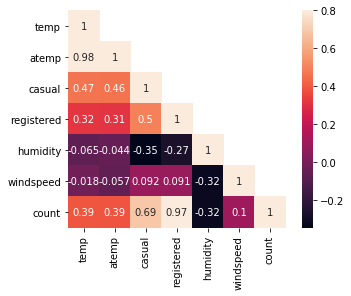

In [131]:
# heatmap을 그려봅시다
train.columns
corrMatt=train[['temp','atemp','casual', 
       'registered','humidity', 'windspeed','count']]
corrMatt=corrMatt.corr()

mask=np.array(corrMatt)
#mask
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrMatt, mask=mask,square=True, 
            annot=True, vmax=.8)

In [121]:
corrMatt.corr()

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.998943,0.526362,0.247817,-0.310719,-0.333366,0.330716
atemp,0.998943,1.000000,0.514612,0.239872,-0.278352,-0.372327,0.321400
casual,0.526362,0.514612,1.000000,0.732518,-0.789949,0.011062,0.838053
registered,0.247817,0.239872,0.732518,1.000000,-0.705815,0.013096,0.985297
humidity,-0.310719,-0.278352,-0.789949,-0.705815,1.000000,-0.570124,-0.763934
windspeed,-0.333366,-0.372327,0.011062,0.013096,-0.570124,1.000000,0.013272
count,0.330716,0.321400,0.838053,0.985297,-0.763934,0.013272,1.000000


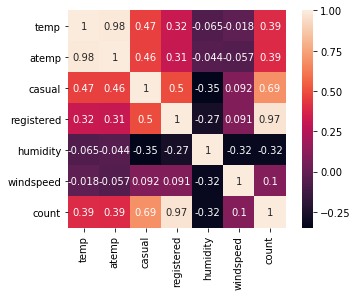

In [132]:
sns.heatmap(corrMatt, square=True, annot=True)
# 히 - 트 - 맵
# 와! 시각적으로 상관계수를 바로 파악할 수 있다!

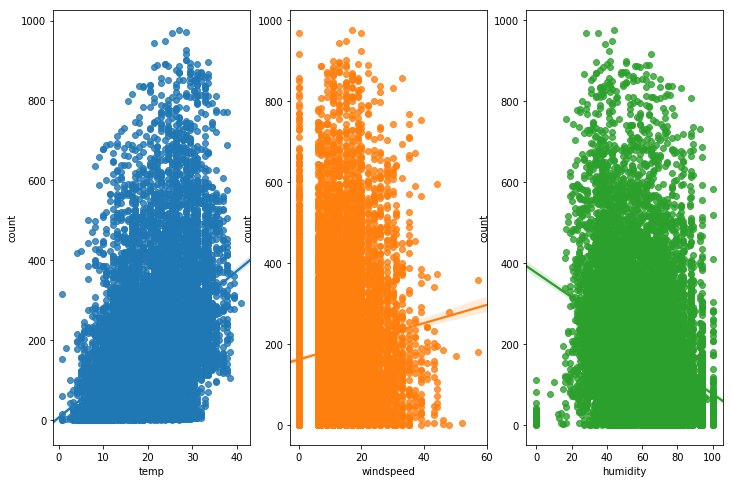

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(12,8))
sns.regplot(x='temp',y='count',data=train, ax=axes[0])
sns.regplot(x='windspeed',y='count',data=train, ax=axes[1])
sns.regplot(x='humidity',y='count',data=train, ax=axes[2])

In [133]:
# 아니 풍속이랑 영향이 있을줄 알았는데 왜 없는것처럼 상관게수 나옴??
# 그래프 찍어보니 0이 엄청 많다!! (데이터에 문제가 있나?)
# 습도는 100퍼 있을수도
mask = np.array(corrMatt)
mask # 상관계수 np배열

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09105166,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.31860699, -0.31737148],
       [-0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
         1.        ,  0.10136947],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10136947,  1.        ]])

In [134]:
mask[np.tril_indices_from(mask)]=False # 그냥 한쪽만 나오게 해주는 상수처럼 쓰는 옵션

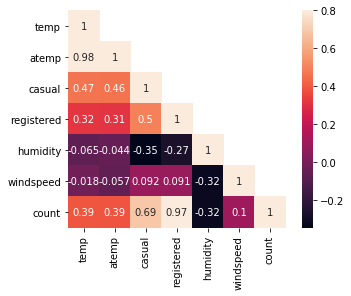

In [135]:
sns.heatmap(corrMatt, mask=mask, annot=True, vmax=.8, square=True)

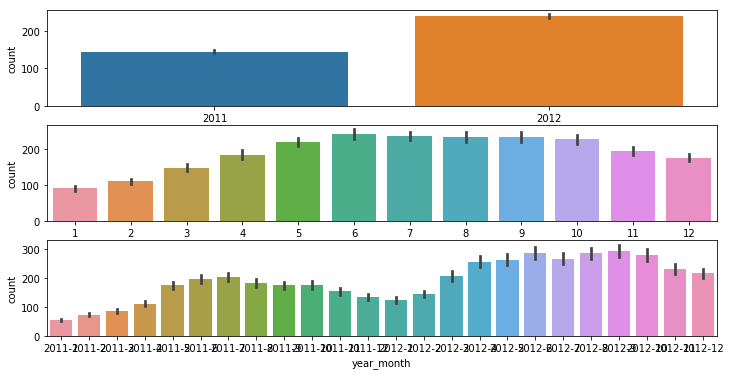

In [139]:
def cym(dtime):
    return "{0}-{1}".format(dtime.year,dtime.month)
train['year_month'] = train['datetime'].apply(cym)
train['year_month']

fig, axes = plt.subplots(nrows=3, figsize=(12,6))
sns.barplot(data=train, x='year',y='count',ax=axes[0])
sns.barplot(data=train, x='month',y='count',ax=axes[1])
sns.barplot(data=train, x='year_month',y='count',ax=axes[2])

In [23]:
# 이게 막상 비교하니 다음해가 훨씬 증가했다

In [24]:
# outlier찾기
train['count'] - train['count'].mean()

0       -175.574132
1       -151.574132
2       -159.574132
3       -178.574132
4       -190.574132
5       -190.574132
6       -189.574132
7       -188.574132
8       -183.574132
9       -177.574132
10      -155.574132
11      -135.574132
12      -107.574132
13       -97.574132
14       -85.574132
15       -81.574132
16       -98.574132
17      -124.574132
18      -156.574132
19      -154.574132
20      -155.574132
21      -157.574132
22      -163.574132
23      -152.574132
24      -174.574132
25      -174.574132
26      -182.574132
27      -185.574132
28      -188.574132
29      -189.574132
            ...    
10856    333.425868
10857    161.425868
10858     76.425868
10859    -23.574132
10860    -59.574132
10861   -110.574132
10862   -150.574132
10863   -176.574132
10864   -188.574132
10865   -186.574132
10866   -184.574132
10867   -160.574132
10868    -79.574132
10869    171.425868
10870    486.425868
10871    125.425868
10872    -27.574132
10873      8.425868
10874     44.425868


In [25]:
3 * train['count'].std() # 평균에서 요만큼 이상 차이나면 아웃라이어로 잡자!

543.4333614908548

In [26]:
trainWithoutOutLiers = train[np.abs(train['count'] - train['count'].mean()) <= 3 * train['count'].std()]
# 아웃라이어 아닌것들만 뽑아냄

In [27]:
trainWithoutOutLiers.shape

(10739, 20)

In [28]:
train.shape

(10886, 20)

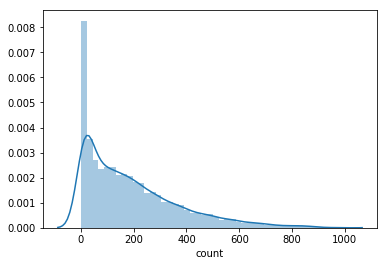

In [29]:
sns.distplot(train['count'])

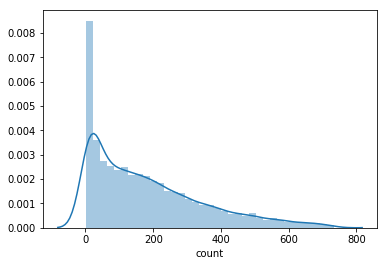

In [30]:
sns.distplot(trainWithoutOutLiers['count'])

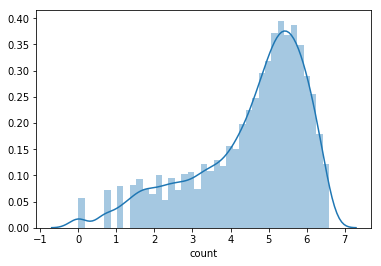

In [31]:
sns.distplot(np.log(trainWithoutOutLiers['count']))

In [32]:
# 우리가 만들어준 파생변수 : 년 / 월 / 일

In [206]:
# 랜덤 포레스트 기반 예측
train = pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'])
# 아예 읽을때 datetime으로 읽자
test = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=['datetime'])

In [207]:
train.shape

(10886, 12)

In [208]:
test.shape

(6493, 9)

In [209]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [210]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

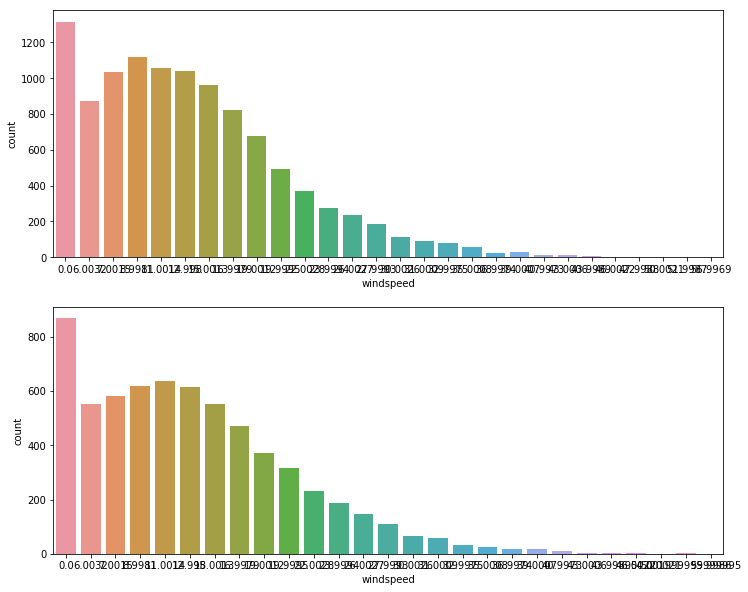

In [211]:
fig, axes = plt.subplots(nrows=2, figsize =(12,10))
sns.countplot(data=train, ax=axes[0], x='windspeed')
# 바람 속도가 0일때 count가 좀 많다 : 이상함
sns.countplot(data=test, ax=axes[1], x='windspeed')

In [212]:
# 풍속이 0인 값을 일곽적으로 평균으로 대체
# 요 select가 windspeed가 0인 놈들
# train.loc[train['windspeed'] == 0, 'windspeed'] = train['windspeed'].mean()
trainWind0 = train.loc[train['windspeed']==0]
trainWindNot0 = train.loc[train['windspeed']!=0]
print(trainWind0.shape, trainWindNot0.shape)

(1313, 19) (9573, 19)


In [213]:
# 풍속을 예측하여 결측값 처리
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]
    wCol = ['season','weather','humidity','month','temp','year','atemp']
    # 풍속이 0이 아닌 데이터들의 타입을 str로 저장
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    rfModel_wind = RandomForestClassifier()
    # 풍속이 0이 아닌 값으로 모델 생성
    # 풍속이 0인 값들을 예측
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    wind0Values = rfModel_wind.predict(X=dataWind0[wCol]) # 바람 0인경우 컬럼들의 값
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wind0Values
    data = predictWindNot0.append(predictWind0)
    data.reset_index(inplace=True)
    data['windspeed'] = data['windspeed'].astype(np.float64)
    return data

train = predict_windspeed(train)
test = predict_windspeed(test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:

In [214]:
train['windspeed'].isnull().sum()

0

In [215]:
test['windspeed'].isnull().sum()

0

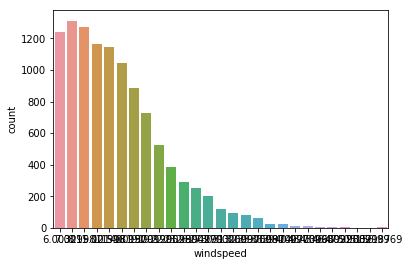

In [216]:
sns.countplot(data=train, x='windspeed')

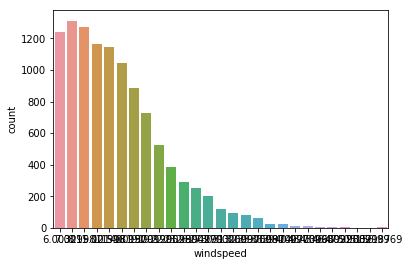

In [217]:
sns.countplot(data=train, x='windspeed')

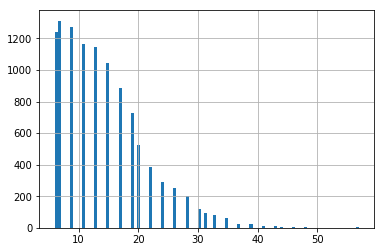

In [218]:
train['windspeed'].hist(bins=100)

In [219]:
train[train['windspeed']==0].size

0

In [220]:
# 피처 선택
# 신호와 잡음 구분
# 피처가 무조건 많다고 해서 좋은 성능이 보장되지는 않음
# 피처를 하나씩 추가하면서(변경), 성능이 좋지 않은 피처들을 버림
cfn = ['season','holiday','workingday','weather','dayofweek','year','month','hour']

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [222]:
train_submit = train.drop('index',axis=1)
train_submit = train_submit.drop('datetime',axis=1)
train_submit = train_submit.drop('count',axis=1)
train_submit = train_submit.drop('minute',axis=1)
train_submit = train_submit.drop('second',axis=1)
train_submit = train_submit.drop('day',axis=1)
train_submit.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,hour,dayofweek
0,1,0,0,2,9.84,12.880,75,6.0032,0,1,2011,1,5,5
1,1,0,0,1,15.58,19.695,76,16.9979,12,24,2011,1,10,5
2,1,0,0,1,14.76,16.665,81,19.0012,26,30,2011,1,11,5
3,1,0,0,1,17.22,21.210,77,19.0012,29,55,2011,1,12,5
4,1,0,0,2,18.86,22.725,72,19.9995,47,47,2011,1,13,5


In [223]:
train_submit = train_submit.drop('casual',axis=1)
train_submit = train_submit.drop('registered',axis=1)
train_submit.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,2,9.84,12.880,75,6.0032,2011,1,5,5
1,1,0,0,1,15.58,19.695,76,16.9979,2011,1,10,5
2,1,0,0,1,14.76,16.665,81,19.0012,2011,1,11,5
3,1,0,0,1,17.22,21.210,77,19.0012,2011,1,12,5
4,1,0,0,2,18.86,22.725,72,19.9995,2011,1,13,5


In [224]:
train_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
year          10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1020.6 KB


In [225]:
train_label = train['count']

In [226]:
test.drop('index',inplace=True,axis=1)
test.drop('datetime',inplace=True,axis=1)
test.drop('minute',inplace=True,axis=1)
test.drop('second',inplace=True,axis=1)
test.drop('day',inplace=True,axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
2,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3
3,1,0,1,1,9.84,11.365,60,15.0013,2011,1,5,3
4,1,0,1,1,9.02,10.605,60,15.0013,2011,1,6,3


In [227]:
for var in cfn:
    train_submit[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [228]:
from sklearn.preprocessing import MinMaxScaler
numlist = ['temp','atemp','humidity','windspeed']
scaler = MinMaxScaler()
for num in numlist:
    t = train_submit[num].values.reshape(-1,1)
    train_submit[num] = scaler.fit_transform(t)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [229]:
for num in numlist:
    t = test[num].values.reshape(-1,1)
    test[num] = scaler.fit_transform(t)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [230]:
train_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null float64
windspeed     10886 non-null float64
year          10886 non-null category
month         10886 non-null category
hour          10886 non-null category
dayofweek     10886 non-null category
dtypes: category(8), float64(4)
memory usage: 427.6 KB


In [231]:
# train_submit = pd.get_dummies(train_submit)

In [232]:
# test = pd.get_dummies(test)

In [233]:
test.shape

(6493, 12)

In [234]:
train_submit.shape

(10886, 12)

In [237]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                              n_estimators=100)
# n_job = core사용수 (-1: 전체사용)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [242]:
train_label.head()

0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [243]:
train['count'].head()

0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [244]:
model.fit(train_submit,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [407]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=2019) # 난수는 걍 숫자주면 됨
kfold # fold갯수 default 3

score = cross_val_score(model, train_submit, train_label, cv=kfold, scoring='accuracy')

In [408]:
score

array([0.01652893, 0.02296739, 0.01837391, 0.01745521, 0.02342673])

In [503]:
tmp = cross_val_score(model, train_submit,train_label,cv=2,scoring='accuracy')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


In [504]:
tmp

array([0.01893805, 0.0145149 ])

In [245]:
train_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null float64
windspeed     10886 non-null float64
year          10886 non-null category
month         10886 non-null category
hour          10886 non-null category
dayofweek     10886 non-null category
dtypes: category(8), float64(4)
memory usage: 427.6 KB


In [246]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
season        6493 non-null category
holiday       6493 non-null category
workingday    6493 non-null category
weather       6493 non-null category
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null float64
windspeed     6493 non-null float64
year          6493 non-null category
month         6493 non-null category
hour          6493 non-null category
dayofweek     6493 non-null category
dtypes: category(8), float64(4)
memory usage: 256.0 KB


In [247]:
pred = model.predict(test)

In [248]:
t1 = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=['datetime'])

In [249]:
sub = pd.DataFrame()
sub['datetime'] = t1['datetime']
sub['count'] = pred
sub.to_csv('submission_bike_3.csv',index=False)

In [102]:
# 답은 원 핫 인코딩 ! : 카테고리 조절 다 해봐라!

In [103]:
train_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 61 columns):
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null float64
windspeed       10886 non-null float32
season_1        10886 non-null uint8
season_2        10886 non-null uint8
season_3        10886 non-null uint8
season_4        10886 non-null uint8
holiday_0       10886 non-null uint8
holiday_1       10886 non-null uint8
workingday_0    10886 non-null uint8
workingday_1    10886 non-null uint8
weather_1       10886 non-null uint8
weather_2       10886 non-null uint8
weather_3       10886 non-null uint8
weather_4       10886 non-null uint8
year_2011       10886 non-null uint8
year_2012       10886 non-null uint8
month_1         10886 non-null uint8
month_2         10886 non-null uint8
month_3         10886 non-null uint8
month_4         10886 non-null uint8
month_5         10886 non-null uint8
month_6         10886 non-null u

In [250]:
train_submit.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,2,0.224490,0.271171,0.75,0.000000,2011,1,5,5
1,1,0,0,1,0.367347,0.423649,0.76,0.215609,2011,1,10,5
2,1,0,0,1,0.346939,0.355856,0.81,0.254894,2011,1,11,5
3,1,0,0,1,0.408163,0.457546,0.77,0.254894,2011,1,12,5
4,1,0,0,2,0.448980,0.491442,0.72,0.274471,2011,1,13,5


In [251]:
train['datetime']

0       2011-01-01 05:00:00
1       2011-01-01 10:00:00
2       2011-01-01 11:00:00
3       2011-01-01 12:00:00
4       2011-01-01 13:00:00
5       2011-01-01 14:00:00
6       2011-01-01 15:00:00
7       2011-01-01 16:00:00
8       2011-01-01 17:00:00
9       2011-01-01 18:00:00
10      2011-01-01 19:00:00
11      2011-01-01 20:00:00
12      2011-01-01 21:00:00
13      2011-01-01 22:00:00
14      2011-01-01 23:00:00
15      2011-01-02 00:00:00
16      2011-01-02 01:00:00
17      2011-01-02 02:00:00
18      2011-01-02 03:00:00
19      2011-01-02 04:00:00
20      2011-01-02 06:00:00
21      2011-01-02 07:00:00
22      2011-01-02 08:00:00
23      2011-01-02 09:00:00
24      2011-01-02 10:00:00
25      2011-01-02 11:00:00
26      2011-01-02 12:00:00
27      2011-01-02 13:00:00
28      2011-01-02 14:00:00
29      2011-01-02 15:00:00
                ...        
10856   2012-12-12 12:00:00
10857   2012-12-12 13:00:00
10858   2012-12-12 14:00:00
10859   2012-12-13 20:00:00
10860   2012-12-13 2